# Exercice N°1 : Prédiction d’un email Spam Using Random Forest algorithm



Le mot "spam" est un message indésirable. L'objectif de ce TP est d'utiliser l’algorithme de

Random Forest pour prédire si un message est un spam ou non. On utilise un ensemble

de données qui contient environ 5 572 emails spam et non spam.

1. Importer les bibliothèques nécessaires.

2. Data Collection et Pre-Processing.

2.1. Télécharger et afficher la base de données.

2.2. Remplacer les valeurs nulles par une chaine de caractère vide.

2.3. Afficher la base de données.

2.4. Afficher le nombre de lignes et de colonnes.

2.5. Remplacer spam et ham par une classification binaire :
    
Spam : 0
Ham :1
2.6. Remplacer les champs messages et catégorie par :
    
Message :X
Catégorie : Y
2.7. Afficher X et Y.

2.8. Tracer la distribution de la base de données sous cette forme : utiliser la fonction

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  , CountVectorizer
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix , roc_auc_score

In [2]:
df = pd.read_csv("mail_data.csv")
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.fillna("" , inplace=True)

In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
df.replace({
    "Category":{"ham" : 1 , "spam": 0},
} , inplace=True)

In [8]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
X = df.iloc[: , -1]
Y = df.iloc[: , :-1]

In [10]:
X.head(4) , Y.head(4)

(0    Go until jurong point, crazy.. Available only ...
 1                        Ok lar... Joking wif u oni...
 2    Free entry in 2 a wkly comp to win FA Cup fina...
 3    U dun say so early hor... U c already then say...
 Name: Message, dtype: object,
    Category
 0         1
 1         1
 2         0
 3         1)

<AxesSubplot: xlabel='Category', ylabel='count'>

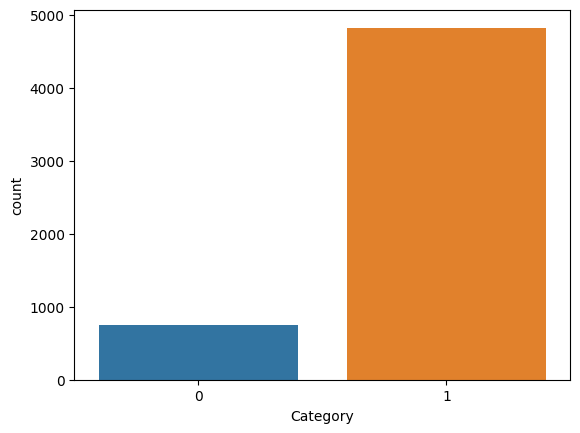

In [11]:
# sns.countplot?
sns.countplot(x=Y["Category"])

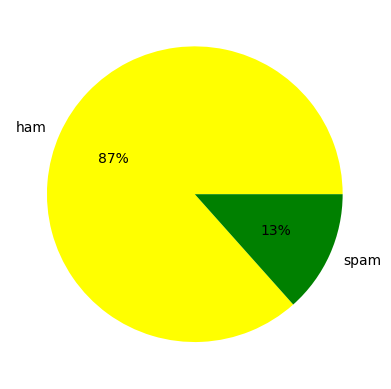

In [12]:
# plt.pie(Y["Category"])
#create pie chart
data = [sum(Y["Category"]) , df.shape[0]-sum(Y["Category"])]
labels = ["ham" , "spam"]
plt.pie(data, labels = labels, colors = ["yellow" , "green"], autopct='%.0f%%')
plt.show()

In [13]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , train_size=0.8)

In [14]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , train_size=0.8)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((4457,), (1115,), (4457, 1), (1115, 1))

4. Transformer le texte du mail en un vecteur pour l’utiliser dans l’algorithme de Random

Forest : utiliser la fonction TfidfVectorizer() ou CountVectorizer(), n’oubliez pas de
l’importer.

In [15]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
vectorizer.fit(x_test)

CountVectorizer()

In [16]:
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [17]:
x_train.shape , x_test.shape

((4457, 3617), (1115, 3617))

5. Normaliser le X_train_vecteur et X_test_vecteur.

6. Convertir y_train et y_test en integers.

7. Construire le modèle de Random Forest

8. Appliquer l’apprentissage automatique.

In [19]:
model = StandardScaler(with_mean= False)
X_train_vecteur = model.fit_transform(x_train)
X_test_vecteur = model.fit_transform(x_test)

In [20]:
X_train_vecteur.shape , X_test_vecteur.shape

((4457, 3617), (1115, 3617))

In [21]:
# Convertir y_train et y_test en integers.
type(Y["Category"])

pandas.core.series.Series

In [22]:
Y["Category"].astype(int)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int32

In [23]:
type(Y["Category"][0])

numpy.int64

Appliquer l’apprentissage automatique.

9. Calculer la prédiction pour X_train_vecteur, calculer l’accuracy score.

10. Calculer la prédiction pour X_test_Vecteur, calculer l’accuracy score.

11. Calculer la probabilité de la prédiction : exemple :

In [24]:
mod = RandomForestClassifier() # max_depth=2, random_state=0
mod.fit(x_train, y_train)

C:\Users\admin\AppData\Local\Temp\ipykernel_4044\1287989946.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod.fit(x_train, y_train)


RandomForestClassifier()

In [25]:
y_pred = mod.predict(X_train_vecteur)

In [26]:
accuracy_score(y_train , y_pred)

0.9995512676688355

In [27]:
precision_score(y_train , y_pred)

0.9994836044410018

In [28]:
rfc1 = RandomForestClassifier(random_state=4).fit(X_train_vecteur , y_train)
y_train_pred = rfc1.predict(X_train_vecteur)
y_train_prob = rfc1.predict_proba(X_train_vecteur)[:,1]

C:\Users\admin\AppData\Local\Temp\ipykernel_4044\2291877497.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc1 = RandomForestClassifier(random_state=4).fit(X_train_vecteur , y_train)


In [29]:
y_train_prob

array([0.99, 1.  , 1.  , ..., 1.  , 1.  , 1.  ])

12. Afficher la matrice de confusion pour l’apprentissage :
confusion_matrix(y_train,y_train_pred)

13. Calculer ROC AUC pour Train : roc_auc_score(y_train, y_train_prob))


<AxesSubplot: >

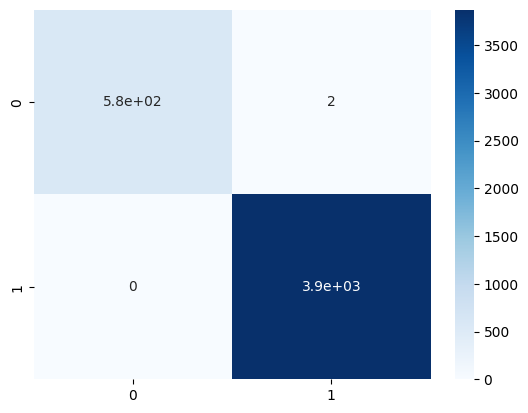

In [30]:
sns.heatmap(data=confusion_matrix(y_train , y_pred) , cmap="Blues" , annot=True)

In [31]:
roc_auc_score(y_train, y_train_prob)

0.9999911832361579

    
14. Refaire les questions 11,12 et 13 pour la partie test.

15. Tester l’algorithme de Random Forest pour prédire si un mail est spam ou non :

In [32]:
rfc = RandomForestClassifier(random_state=4).fit(X_test_vecteur , y_test)
y_test_pred = rfc.predict(X_test_vecteur)
y_test_prob = rfc.predict_proba(X_test_vecteur)[:,1]

C:\Users\admin\AppData\Local\Temp\ipykernel_4044\3767076983.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = RandomForestClassifier(random_state=4).fit(X_test_vecteur , y_test)


In [33]:
y_test_prob

array([0.98, 0.99, 1.  , ..., 1.  , 0.27, 1.  ])

In [34]:
y_test_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

<AxesSubplot: >

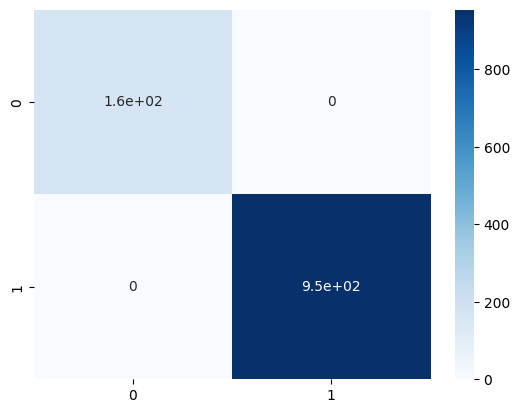

In [35]:
sns.heatmap(data=confusion_matrix(y_test , y_test_pred) , cmap="Blues" , annot=True)

In [36]:
roc_auc_score(y_test, y_test_prob)

1.0

In [37]:
test = vectorizer.transform(["hi i am test you, if you can identifying me ...... i am a spam text"])

In [38]:
mod.predict(test)

array([1], dtype=int64)

# Fin.